In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
X=df[["Height"]].values
y_true=df[["Weight"]].values

In [4]:
def line(x,w=0,b=0):
    return w*x+b

In [5]:
def mean_squared_error(y_true,y_pred):
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean())

    

Text(0.5, 0, 'b')

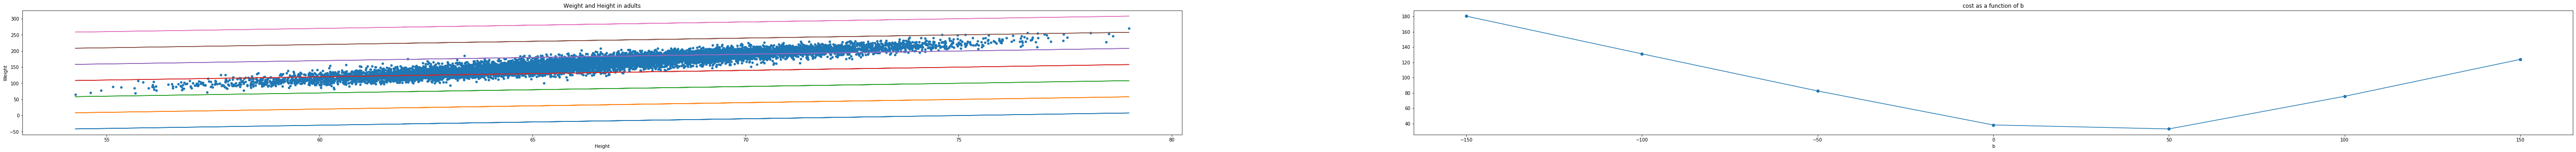

In [6]:
plt.figure(figsize=(100,5))
ax1=plt.subplot(121)
df.plot(kind='scatter', 
       x='Height',
       y='Weight',
       title='Weight and Height in adults', ax=ax1)
bs=np.array([-150,-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(X, w=2, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
    
ax2=plt.subplot(122)
plt.plot(bs, mses, 'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [33]:
 model.compile(Adam(lr=0.8), 'mean_squared_error')

In [34]:
model.fit(X,y_true, epochs=40)

Train on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 4s 392us/sample - loss: 771.4704
Epoch 2/40
10000/10000 [==============================] - 1s 91us/sample - loss: 538.2600
Epoch 3/40
10000/10000 [==============================] - 1s 100us/sample - loss: 486.6464
Epoch 4/40
10000/10000 [==============================] - 1s 128us/sample - loss: 452.4295
Epoch 5/40
10000/10000 [==============================] - 1s 120us/sample - loss: 394.3193
Epoch 6/40
10000/10000 [==============================] - 1s 99us/sample - loss: 366.7354
Epoch 7/40
10000/10000 [==============================] - 1s 87us/sample - loss: 326.2824
Epoch 8/40
10000/10000 [==============================] - 1s 95us/sample - loss: 295.0886
Epoch 9/40
10000/10000 [==============================] - 1s 94us/sample - loss: 276.4577
Epoch 10/40
10000/10000 [==============================] - 1s 83us/sample - loss: 243.9868
Epoch 11/40
10000/10000 [==============================] - 1s 78us/sampl

In [35]:
y_pred=model.predict(X)

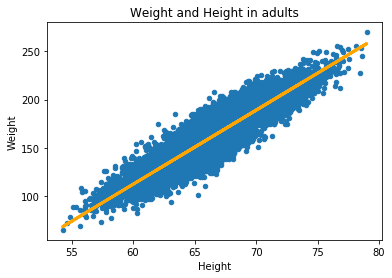

In [37]:
df.plot(kind='scatter',
       x='Height',
       y='Weight', title='Weight and Height in adults')
plt.plot(X, y_pred, color='orange', linewidth=3)

In [39]:
w,b=model.get_weights()

In [40]:
w

array([[7.692159]], dtype=float32)

In [41]:
b

array([-349.43832], dtype=float32)

In [43]:
model.predict([[200]])

array([[1188.9935]], dtype=float32)